## Enviroment Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
data = pd.read_csv("accepted_2007_to_2018Q4.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
import copy
loans = copy.deepcopy(data)

## EDA (Exploratory data analysis)

In [ ]:
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [ ]:
loans.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [ ]:
loans['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

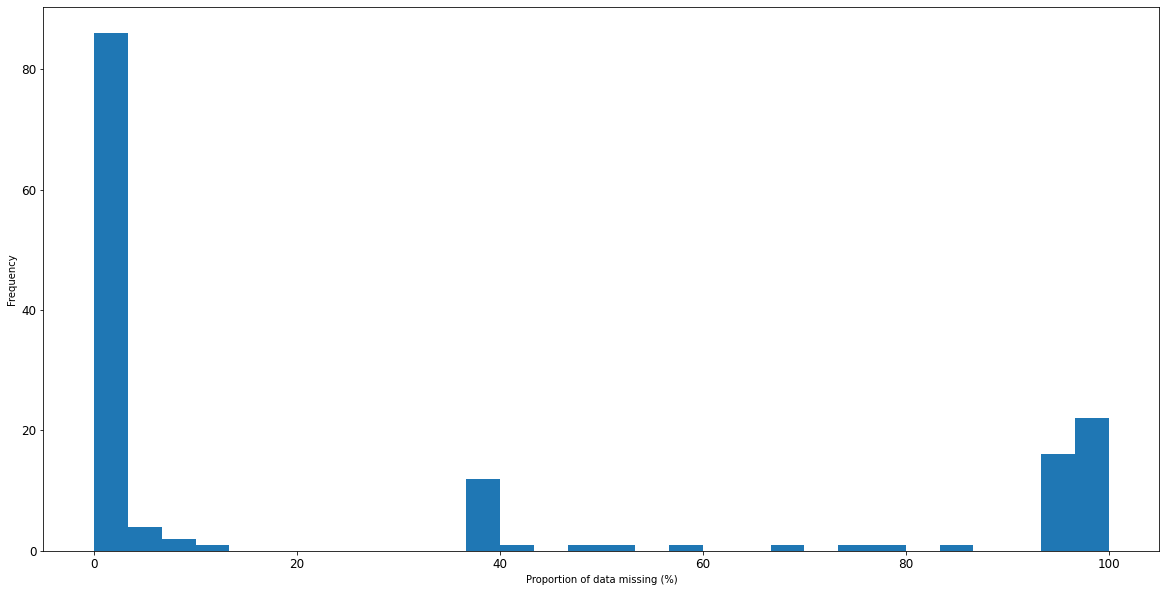

In [ ]:
#@title Calculating proporations of missing data
missing_data = loans.isnull().mean().sort_values(ascending=False)*100

plt.figure(figsize=(20,10))

plt.xlabel('Proportion of data missing (%)')
plt.ylabel('Count')
missing_data.plot.hist(bins=30, fontsize=12);


In [ ]:
missing_data

member_id                                     100.000000
orig_projected_additional_accrued_interest     99.617331
hardship_end_date                              99.517097
hardship_start_date                            99.517097
hardship_type                                  99.517097
                                                 ...    
policy_code                                     0.001460
revol_bal                                       0.001460
fico_range_high                                 0.001460
fico_range_low                                  0.001460
id                                              0.000000
Length: 151, dtype: float64

In [ ]:
columns_to_drop = sorted(list(missing_data[missing_data > 10].index))
columns_to_drop

['all_util',
 'annual_inc_joint',
 'debt_settlement_flag_date',
 'deferral_term',
 'desc',
 'dti_joint',
 'hardship_amount',
 'hardship_dpd',
 'hardship_end_date',
 'hardship_last_payment_amount',
 'hardship_length',
 'hardship_loan_status',
 'hardship_payoff_balance_amount',
 'hardship_reason',
 'hardship_start_date',
 'hardship_status',
 'hardship_type',
 'il_util',
 'inq_fi',
 'inq_last_12m',
 'max_bal_bc',
 'member_id',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'mths_since_rcnt_il',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'next_pymnt_d',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'open_rv_12m',
 'open_rv_24m',
 'orig_projected_additional_accrued_interest',
 'payment_plan_start_date',
 'revol_bal_joint',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_earliest_cr_line',
 'sec_app_fico_range_high',
 'sec_app_fico_range_low',
 'sec

In [ ]:
#@title Droping the colums with high missing values
loans.drop(labels=columns_to_drop, axis=1, inplace=True)

In [ ]:
loans.columns.shape

(92,)

In [ ]:
data['funded_amnt']

0           3600.0
1          24700.0
2          20000.0
3          35000.0
4          10400.0
            ...   
2260696    40000.0
2260697    24000.0
2260698    14000.0
2260699        NaN
2260700        NaN
Name: funded_amnt, Length: 2260701, dtype: float64

In [ ]:
#@title Removing information that prospective lenders would not know
excluded_features = ['acc_now_delinq',  # won't know at time of the loan
                     'acc_open_past_24mths',  # Lending Club metric
                     'application_type',  # Not relevant
                     'bc_open_to_buy',  # Not relevant
                     'chargeoff_within_12_mths',  # Lending Club metric
                     'collection_recovery_fee',  # won't know at time of the loan
                     'debt_settlement_flag',  # won't know at time of the loan
                     'disbursement_method',  # irrelevant
                     'earliest_cr_line',  # relevance?
                     'fico_range_low',  # Credit score - defeats purpose of the exercise!
                     'fico_range_high',  # Credit score - defeats purpose of the exercise!
                     'funded_amnt',  # won't know at time of the loan
                     'funded_amnt_inv',  # won't know at time of the loan
                     'hardship_flag',  # won't know at time of the loan
                     'id',  # irrelevant
                     'initial_list_status',  # irrelevant
                     'last_credit_pull_d',  # won't know at time of loan
                     'last_fico_range_high',  # won't know at time of loan
                     'last_fico_range_low',  # won't know at time of loan
                     'last_pymnt_d',  # irrelevant
                     'last_pymnt_amnt',  # irrelevant
                     'policy_code',  # irrelevant
                     'pymnt_plan',  # won't know at time of loan
                     'recoveries',  # won't know at time of loan
                     'out_prncp_inv',  # won't know at time of loan
                     'out_prncp',  # won't know at time of loan
                     'tot_hi_cred_lim',  # definition?
                     'title',  # irrelevant
                     'total_pymnt',  # won't know at time of loan
                     'total_pymnt_inv',  # won't know at time of loan
                     'total_rec_int',  # won't know at time of loan
                     'total_rec_late_fee',  # won't know at time of loan
                     'total_rec_prncp',  # won't know at time of loan
                     'total_rev_hi_lim',  # definition?
                     'url',  # irrelevant
                     'collections_12_mths_ex_med' , # won't know at time of application
                     'delinq_2yrs',
                    'inq_last_6mths',
                    'revol_bal',
                    'revol_util',
                    'tot_coll_amt',
                    'tot_cur_bal',
                    'delinq_amnt',
                    'mo_sin_old_il_acct',
                    'mo_sin_old_rev_tl_op',
                    'mo_sin_rcnt_rev_tl_op',
                    'num_accts_ever_120_pd',
                    'num_tl_120dpd_2m',
                    'num_tl_30dpd',
                    'num_tl_op_past_12m',
                    'pct_tl_nvr_dlq'
]
loans.drop(labels=excluded_features, axis=1, inplace=True)

In [ ]:
loans.isnull().sum()

loan_amnt                         33
term                              33
int_rate                          33
installment                       33
grade                             33
sub_grade                         33
emp_title                     167002
emp_length                    146940
home_ownership                    33
annual_inc                        37
verification_status               33
issue_d                           33
loan_status                       33
purpose                           33
zip_code                          34
addr_state                        33
dti                             1744
open_acc                          62
pub_rec                           62
total_acc                         62
avg_cur_bal                    70379
bc_util                        76104
mo_sin_rcnt_tl                 70309
mort_acc                       50063
mths_since_recent_bc           73445
num_actv_bc_tl                 70309
num_actv_rev_tl                70309
n

In [ ]:
loans['emp_title'].nunique()

512694

In [ ]:
loans = loans.drop('emp_title',axis=1)

In [ ]:
emp_length_order = sorted(loans['emp_length'].dropna().unique())

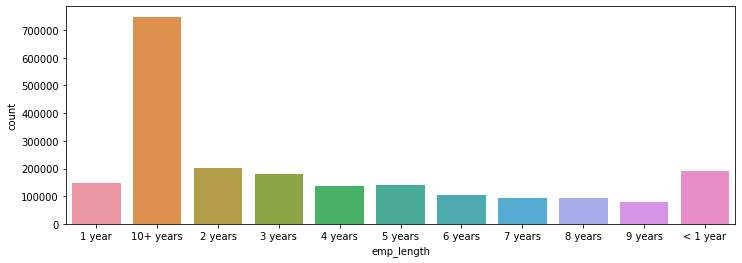

In [ ]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=loans,order=emp_length_order)

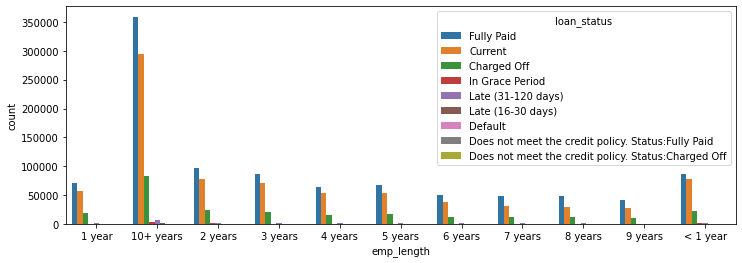

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=loans,order=emp_length_order,hue='loan_status')

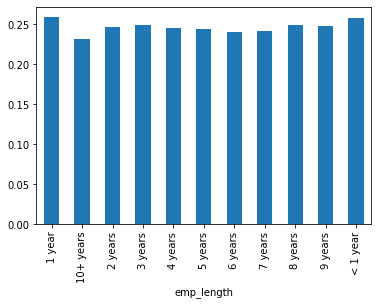

In [ ]:
emp_co = loans[loans['loan_status']=='Fully Paid'].groupby("emp_length").count()['loan_status']
emp_fp = loans[loans['loan_status']=='Charged Off'].groupby("emp_length").count()['loan_status']
emp_len = emp_fp/emp_co
emp_len.plot(kind='bar')

In [ ]:
loans = loans.drop('emp_length',axis=1)

## Refining our dependent variable

In [ ]:
loans['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [ ]:
#@title Filtering the data on fully based and charged of bases
loans = loans.loc[loans['loan_status'].isin(['Fully Paid','Charged Off'])]
print("Number of loans: "+"{:,.0f}".format(len(loans)))

Number of loans: 1,345,310


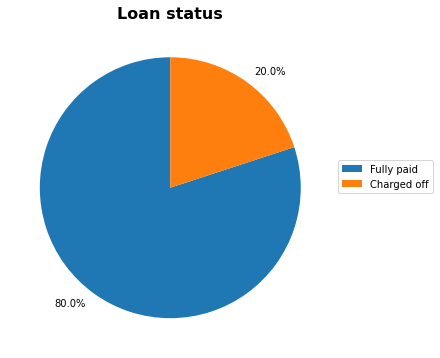

In [ ]:
#@title Distribution of Possible Label Outputs
loans['loan_status'].value_counts(dropna=False)
chargeoffrate = loans['loan_status'].value_counts(normalize=True,dropna=False)

# Showing it visually in a pie chart; creating the labels for the chart:
labels = []
for i in chargeoffrate:
    labels.append(str(round(i*100,0))+"%")

# Creating the pie chart
plt.figure(figsize=(12,6))
plt.title('Loan status', fontsize=16, fontweight='bold');
plt.pie(chargeoffrate,labels=labels,startangle=90);
plt.legend(['Fully paid','Charged off'], loc='best', bbox_to_anchor=(1, 0.6));

Fully paid loans amount to $15.2bn
Charged off loans amount to $4.2bn
Life time cost of risk (CoR) is 21.5%


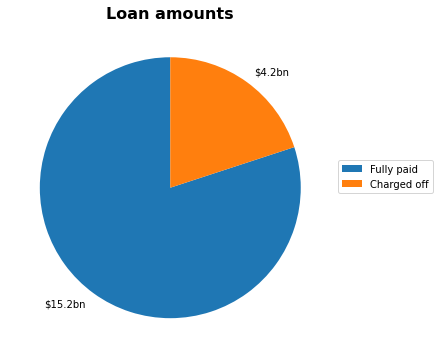

In [ ]:
#@title Calculating Life time cost of risk
chargeoffamount = loans.groupby('loan_status').loan_amnt.sum().sort_values(ascending=False)

# Showing the amounts in $bn
print("Fully paid loans amount to $"+str(round(chargeoffamount[0]/1e9,1))+"bn")
print("Charged off loans amount to $"+str(round(chargeoffamount[1]/1e9,1))+"bn")

# What is this as a percentage of the charge off rate, i.e. the cost of risk (CoR)?
Total_CoR = chargeoffamount[1]/loans['loan_amnt'].sum()
print("Life time cost of risk (CoR) is "+str(round(Total_CoR*100,1))+"%")

labels = []
for i in chargeoffamount:
    labels.append('$'+str(round(i/1e9,1))+"bn")

# Creating the pie chart
plt.figure(figsize=(12,6))
plt.title('Loan amounts', fontsize=16, fontweight='bold');
plt.pie(chargeoffrate,labels=labels,startangle=90);
plt.legend(['Fully paid','Charged off'], loc='best', bbox_to_anchor=(1, 0.6));

In [ ]:
#@title Average Rate of Interest
loans['int_amnt'] = loans['int_rate']*loans['loan_amnt']
wgt_av_int_rate = loans['int_amnt'].sum()/loans['loan_amnt'].sum()

print('Average interest rate of the book is: '+str(round(loans['int_rate'].mean(),2))+"%")
print('Weighted av. rate of the book is: '+str(round(wgt_av_int_rate,2))+"%")

Average interest rate of the book is: 13.24%
Weighted av. rate of the book is: 13.65%


## Analysis of Independent Attributes

In [ ]:
from  matplotlib.font_manager import FontProperties

In [ ]:
def plot_var(col_name, full_name, df=loans, continuous=True, rotation=0, alignment='center'):
    """
    Visualises the distribution of a variable and assess its impact on success rate.
    - col_name (variable): variable name in the dataframe
    - full_name (string): full variable name for presentation purposes
    - df (df): name of the dataframe
    - continuous (bool): True if the variable is continuous, and is set as True as default
    - rotation (int): rotation of the x axis labels
    - alignment (string): alignment of the x axis labels and should be 'right' if rotating the labels
    - returns: two charts analysing the loan portfolio
    """

    # Set up figure space:
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4), dpi=90)
    sns.set(palette='bright')

    # Set the font options for the x/y axes labels:
    font = FontProperties(size=12)
    font.set_style('italic')

    # Plot distribution of the variable without showing charge off rate
    if continuous:
        # Show a histogram to visualise variable
        sns.histplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1, bins=30)
    else:
        x_labels = df[col_name].sort_values().unique()
        sns.countplot(x=df[col_name], order=sorted(df[col_name].unique()), ax=ax1).set_xticklabels(x_labels, rotation=rotation, horizontalalignment=alignment)

    # Formatting the x labels
    ax1.set_xlabel(full_name, fontproperties=font)

    # Formatting the y labels
    y_labels_1 = ['{:,.0f}'.format(x) + 'K' for x in ax1.get_yticks()/1000]
    # ax1.yaxis.set_major_locator(mticker.FixedLocator(ax1.get_yticks().tolist()))
    ax1.set_yticklabels(y_labels_1)
    ax1.set_ylabel('Count', fontproperties=font)

    # Formatting the title
    ax1.set_title(full_name+"\n", fontweight='bold')

    # Plot distribution of variable split by loan status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=df, ax=ax2)
        ax2.set_ylabel('Loan status', fontproperties=font)
        ax2.set_title(full_name + ' by loan status'+"\n", fontweight='bold')
    else:
        charge_off_rates = df.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, ax=ax2)

        # Formatting the x-axis
        ax2.set_xticklabels(charge_off_rates.index,rotation=rotation, horizontalalignment=alignment)

        # Formatting the y-axis
        y_labels_2 = ['{:,.0f}'.format(x) + '%' for x in ax2.get_yticks()*100]
        # ax2.yaxis.set_major_locator(mticker.FixedLocator(ax2.get_yticks().tolist()))
        ax2.set_yticklabels(y_labels_2)
        ax2.set_ylabel('Proportion of loans charged off', fontproperties=font)

        # Formatting the title
        ax2.set_title('Charge off rate by ' + full_name+"\n", fontweight='bold')

    ax2.set_xlabel(full_name, fontproperties=font)

    plt.tight_layout()

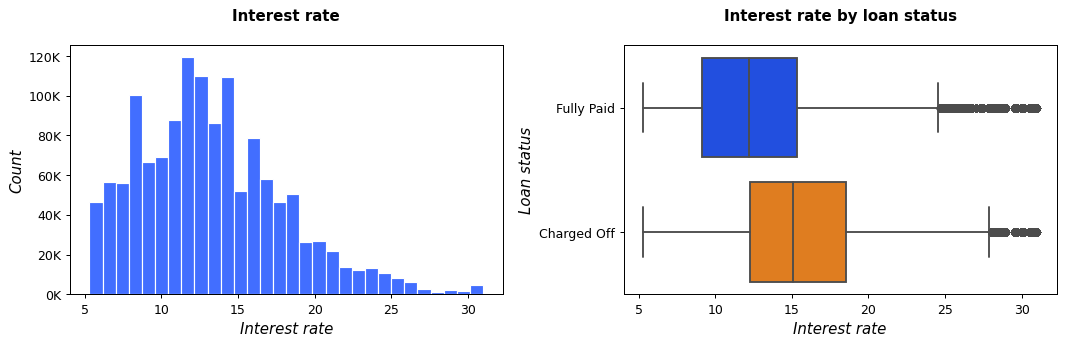

In [ ]:
plot_var('int_rate', 'Interest rate', loans)

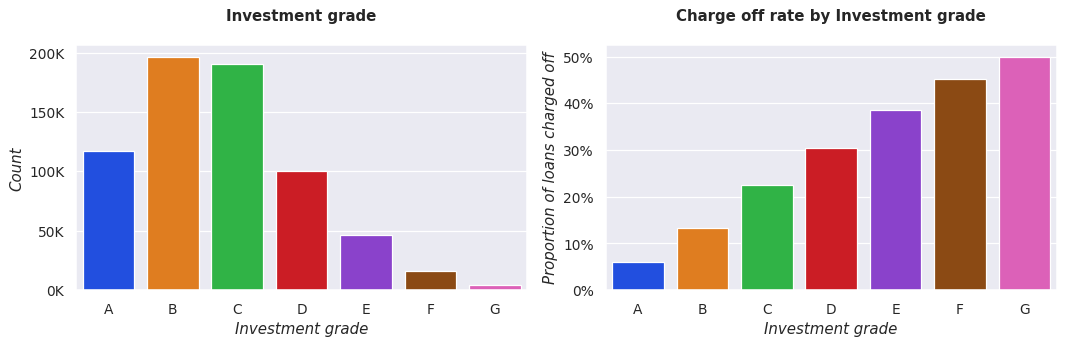

In [ ]:
plot_var('grade','Investment grade',continuous=False)

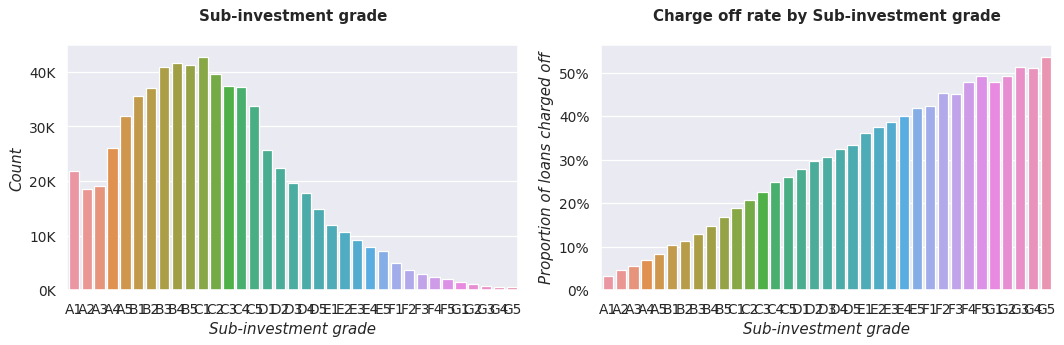

In [ ]:
plot_var('sub_grade','Sub-investment grade',continuous=False)

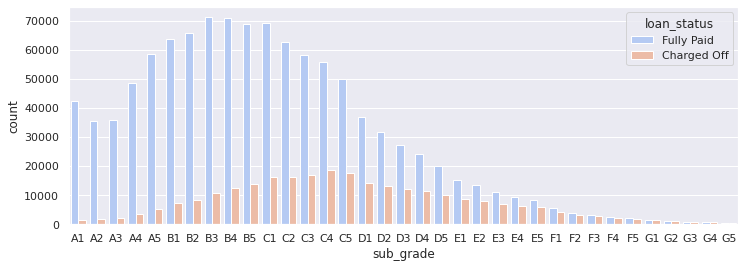

In [ ]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(loans['sub_grade'].unique())
sns.countplot(x='sub_grade',data=loans,order = subgrade_order,palette='coolwarm' ,hue='loan_status')

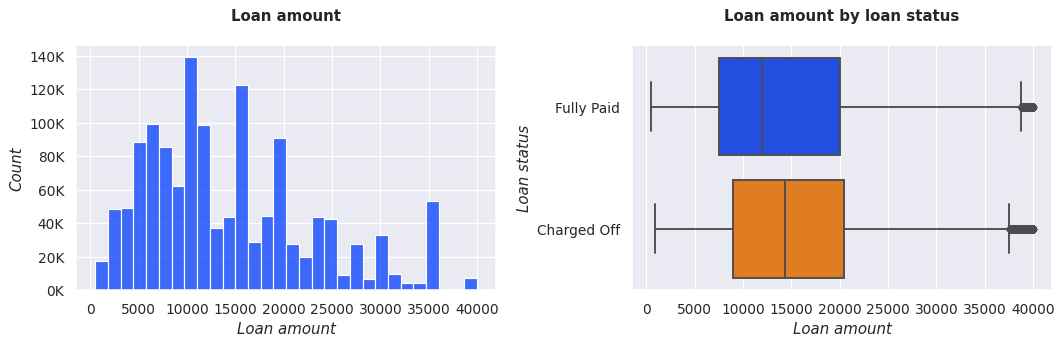

In [ ]:
plot_var('loan_amnt', 'Loan amount')

In [ ]:
loans['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
loans['term'] = loans.term.map({' 36 months': 36, ' 60 months': 60})


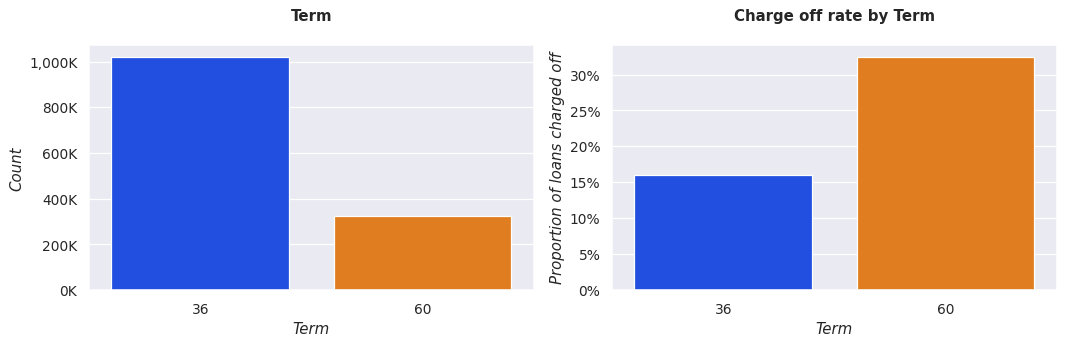

In [ ]:
plot_var('term', 'Term', continuous=False)

In [ ]:
len(loans.columns)

40

In [ ]:
temp = copy.deepcopy(loans)

## Data Preprocessing and Cleaning

In [ ]:
loans.fillna(0, inplace=True)
loans = loans.loc[loans['loan_status'].isin(['Fully Paid','Charged Off'])]

# Cleaning home ownership:
loans["home_ownership"].replace(["NONE", "ANY"], "OTHER", inplace=True)

# Swapping the charge off and fully paid strings for 1/0
loans.insert(1, 'charge_off_rate', loans.loan_status.map({'Charged Off': 1, 'Fully Paid': 0}))

# Dropping dependent variables like grade and installment:
dep_vars = ["grade", "sub_grade", "installment", "loan_status", "addr_state"]
loans.drop(columns=dep_vars, axis=1, inplace=True)

# After analysis, dropping columns with no impact on creditworthiness:
no_indict = ['zip_code']

loans.drop(columns=no_indict, axis=1, inplace=True)

# Removing outliers on DTI column:
loans['dti'].values[loans['dti'].values > 40] = 40
loans['dti'].values[loans['dti'].values < 0] = 0

# Removing outliers in open accounts column:
# loans['open_acc'].values[loans['open_acc'].values > 30] = 30

# Removing outliers (>100) in revolver utilisation rates:
# loans['revol_util'].values[loans['revol_util'].values > 100] = 100

# Removing the tail (36m+) of months since recent revolver opened:
# loans['mo_sin_rcnt_rev_tl_op'].values[loans['mo_sin_rcnt_rev_tl_op'].values > 36] = 36

# Removing the tail (36m+) of months since recent account opened:
# loans['mo_sin_rcnt_tl'].values[loans['mo_sin_rcnt_tl'].values > 36] = 36

# # Creating two columns useful for calculations later:
# loans['term_amnt'] = loans['term'] * loans['loan_amnt']
# loans['int_rate_amnt'] = loans['int_rate'] * loans['loan_amnt']

#percenatge of the salary


# adding new coloumns

# features= [ "purpose", "verification_status", "home_ownership"]
# loans = pd.get_dummies( loans, columns= features, drop_first = True)

loans['term']= loans['term'].str.slice(start=1,stop=3)
loans['term'] = loans['term'].astype(int)


AttributeError: ignored

In [ ]:
loans = loans.sort_values('charge_off_rate')
length_of_default = len(loans.loc[loans['charge_off_rate'] == 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_1 = loans[:length_of_default]
data_2 = loans[length_of_default:]

X_1 = data_1.drop('charge_off_rate', axis='columns')
Y_1 = data_1.charge_off_rate
X_2 = data_2.drop('charge_off_rate', axis='columns')
Y_2 = data_2.charge_off_rate

X_1train, X_1test, Y_1train, Y_1test = train_test_split(X_1, Y_1, test_size = 0.2, random_state = 42)
X_2train, X_2test, Y_2train, Y_2test = train_test_split(X_2, Y_2, test_size = 0.2, random_state = 42)

X_train = [X_1train, X_2train]
X_train = pd.concat(X_train)
Y_train = [Y_1train, Y_2train]
Y_train = pd.concat(Y_train)
X_test = [X_1test, X_2test]
X_test = pd.concat(X_test)
Y_test = [Y_1test, Y_2test]
Y_test = pd.concat(Y_test)

In [ ]:
X_train

In [ ]:
correlation_Mat = loans.corr()
plt.figure(figsize=(30,20))
sns.heatmap(correlation_Mat, annot=True,cmap='viridis')
plt.show()
# df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.5)
print(len(corr_features))

In [ ]:
correlation_Mat = loans.corr()
plt.figure(figsize=(30,20))
sns.heatmap(correlation_Mat, annot=True,cmap='viridis')
plt.show()
# df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

In [ ]:
tempdata = X_train.drop(list(corr_features), axis = 1)
tempdata2 = X_test.drop(list(corr_features), axis = 1)

In [ ]:
tempdata

In [ ]:
corr_features = correlation(tempdata, 0.5)
print(len(corr_features))

In [ ]:
correlation_Mat = tempdata.corr()
plt.figure(figsize=(30,20))
sns.heatmap(correlation_Mat, annot=True,cmap='viridis')
plt.show()

In [ ]:
features= [ "purpose", "verification_status", "home_ownership"]
tempdata = pd.get_dummies( tempdata, columns= features, drop_first = True)
tempdata2 = pd.get_dummies( tempdata2, columns= features, drop_first = True)

In [ ]:
tempdata = tempdata.drop(columns='issue_d', axis=1)
tempdata2 = tempdata2.drop(columns='issue_d', axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = LogisticRegression(random_state=0).fit(tempdata,  Y_train)
y_pred = clf.predict(tempdata2)
cm = confusion_matrix(Y_test, y_pred)
print(cm)

In [ ]:
print ("Accuracy : ", accuracy_score(Y_test, y_pred))

In [ ]:
loans.columns
# funded_amnt
# funded_amnt_inv
# installment
# grade
#

In [ ]:
temp_cal_x = ['loan_amnt',

'open_acc',
'total_pymnt',
'total_rec_int',
'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
                   'verification_status_Source Verified', 'verification_status_Verified',
                   'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational',
                   'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
                   'purpose_medical', 'purpose_moving', 'purpose_other',
                   'purpose_renewable_energy', 'purpose_small_business',
                   'purpose_vacation', 'purpose_wedding']
temp_cal_y = ["charge_off_rate"]

In [ ]:

testing_years_start = 2016


loans['year'] = pd.DatetimeIndex(loans['issue_d']).year
loans_train = loans.copy().loc[loans['year'] <= (testing_years_start-1)]
loans_test = loans.copy().loc[loans['year'] >= testing_years_start]


X_train = loans_train[temp_cal_x]
y_train = loans_train[temp_cal_y]

X_test = loans_test[temp_cal_x]
y_test = loans_test[temp_cal_y]

In [ ]:
from  matplotlib.font_manager import FontProperties

In [ ]:
amnt_by_year = loans.groupby('year').loan_amnt.sum()/1e6
amount = list(amnt_by_year.values)
year = list(amnt_by_year.index)
group = []
for i in range(loans.year.min(),loans.year.max()+1):
    if i >= testing_years_start: group.append('Test')
    else: group.append('Train')

graph_data = pd.DataFrame({'Year': year,'Loan amount': amount,'Group': group})

# Bar plot
figsize = (12, 4)
fig, ax = plt.subplots(figsize=figsize)
sns.barplot(x = 'Year', y = 'Loan amount', hue='Group', data=graph_data, palette = 'bright', dodge = False);

# Set the font options for the x/y axes labels:
font = FontProperties(size=14)
font.set_style('italic')

plt.title('Loans by year\n', fontsize=16, fontweight='bold')
plt.ylabel('Loan amount ($bn)', fontsize=14, fontproperties=font)
ylabels = ['{:,.1f}'.format(y) for y in ax.get_yticks()/1000]


In [ ]:
def book_stats(df, title):
    """
    Function returns the key stats for the dataframe of loans
    - df (df): dataframe we'll input to calculate the metrics from
    - title (string): title of the output
    - returns a number of financial stats as floats
    """

    # Creating some variables for outputs later:
    wgt_av_term = df['term_amnt'].sum() / df['loan_amnt'].sum()
    wgt_av_int_rate = df['int_rate_amnt'].sum() / df['loan_amnt'].sum()
    charge_off_rate = df['loan_status'].value_counts(normalize=True, dropna=False)
    charge_off_amount = df.groupby('loan_status').loan_amnt.sum().sort_values(ascending=False)
    total_CoR = charge_off_amount[1] / df['loan_amnt'].sum()

    # And printing them out:
    print(title)
    print("  - Wgt. av. term is: " + str(round(wgt_av_term, 2)) + " months")
    print("  - Wgt. av. interest rate is: " + str(round(wgt_av_int_rate, 2)) + "%")
    print("  - Total cost of risk is: " + str(round(total_CoR * 100, 2)) + "%")

    return wgt_av_term, wgt_av_int_rate, charge_off_rate, charge_off_amount, total_CoR

In [ ]:
# loans['term']= loans['term'].str.slice(start=1,stop=3)

# loans['term'] = loans['term'].astype(int)
# loans['term_amnt'] = loans['term'] * loans['loan_amnt']
# loans['int_rate_amnt'] = loans['int_rate'] *loans['int_rate']






In [ ]:
# book_stats(loans, 'Total book')
# book_stats(loans_train, 'Training set')
# book_stats(loans_test, 'Test set')

In [ ]:
def matrix_stats(matrix):
    """
    Function to tell us the precision and recall of our confusion matrix as well as what %age of loans we're approving
    - Matrix: confusion matrix
    - Returns: A number of stats as floats
    """

    # Setting the true/false positive/negatives
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    TN = matrix[0][0]

    # Calculating the outputs
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    F1_score = 2*(precision*recall)/(precision+recall)
    approval_rate = (matrix[0][0] + matrix[1][0]) / (matrix[0].sum() + matrix[1].sum())

    print("Accuracy: " + str(round(accuracy, 3)))
    print("Precision: " + str(round(precision, 3)))
    print("Recall: " + str(round(recall, 3)))
    print("F1 score: " + str(round(F1_score, 3)))
    print("Approval rate: " + str(round(approval_rate * 100, 1)) + "%")

    return precision, recall, F1_score, approval_rate

In [ ]:
n = y_train.value_counts()
class_weights = {0:1- n[0]/n.sum(), 1:1- n[1]/n.sum()}

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train.drop(columns=["grade"], axis=1, inplace=True)
X_test.drop(columns=["grade"], axis=1, inplace=True)


In [ ]:
logreg.fit(X_train_subset, y_train_subset.values.ravel())

# Create an output for our predictions
logreg_y_pred = (logreg.predict_proba(X_test)[:,1]>0.5)

# Create our confusion matrix
logreg_conf_matrix = confusion_matrix(y_test, logreg_y_pred)

In [ ]:
def heatmap(matrix,title,size=(8,6)):
    """
    Function to create a heatmap chart of a confusion matrix.
    - Matrix is the confusion matrix to be represented
    - Title (string) is the title of the graph
    - Size (tuple) is the size of the chart, set at 6x4 as default
    - Returns a heatmap chart
    """

    # Setting the axis labels:
    xticks = yticks = ['Fully Paid', 'Charged Off']

    # Setting the heatmap labels:
    annot=matrix
    """
    If True, write the data value in each cell. If an array-like with the same shape as data, then use this
    to annotate the heatmap instead of the data. Note that DataFrames will match on position, not index.
    """

    # Set the font options:
    font = FontProperties(size=16)
    font.set_style('italic')

    #Build the chart
    plt.rcParams['figure.figsize'] = size
    fig = sns.heatmap(matrix,annot=annot,cmap='rainbow', linewidths=1, linecolor='white',
                      xticklabels=xticks, yticklabels=yticks, fmt=",", annot_kws={"size":14},
                      cbar_kws={'label': '\nNumber of applications'})
    fig.figure.axes[-1].yaxis.label.set_size(14)

    # Setting the font size for the colorbar
    cbar = fig.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14)

    # X-axis and tick marks labels
    fig.set_xlabel('Predicted condition', fontproperties=font)
    plt.xticks(fontsize=14)

    # y-axis and tick marks label
    fig.set_ylabel('True condition', horizontalalignment='center', fontproperties=font)
    plt.yticks(fontsize=14, verticalalignment='center')

    # Title settings
    fig.set_title(title+"\n", fontsize=20, fontweight="bold");

    return fig

In [ ]:
heatmap(logreg_conf_matrix,'Logistic regression performance');

In [ ]:
logreg_precision, logreg_recall, logreg_F1_score, logreg_approval_rate = matrix_stats(logreg_conf_matrix)

In [ ]:
neighbours = 3
def KNN_model_build(neighbours, X_train_subset, y_train_subset, X_test, y_test):
    """
    Function to build the KNN model
    - neighbours (int): K, the number of near-neighbours for the model
    - X_train_subset (df): the training set
    - y_train_subset (df): the training dependent variable
    - X_test (df): test set
    - y_test: dependent variable
    - returns: confusion matrix, the predicted variable series
    """

    KNN = KNeighborsClassifier(n_neighbors=neighbours)

    # Train the model using the training sets
    KNN.fit(X_train, y_train)

    # Predict output using our model:
    KNN_y_pred = (KNN.predict_proba(X_test)[:,1] > 0.5)

    # Calculate the confusion matrix:
    KNN_conf_matrix = confusion_matrix(y_test, KNN_y_pred)

    return KNN_conf_matrix, KNN_y_pred
KNN_conf_matrix, KNN_y_pred = KNN_model_build(neighbours, X_train, y_train, X_test, y_test)
heatmap(KNN_conf_matrix,'KNN performance');

In [ ]:
undersample = False
target_FP_proportion = 0.5
# Changing the training subset to the desired proportion of Fully Paid loans
if undersample:
    # Creating a new dataframe with only the fully paid loans:
    loans_train_FP = loans_train[loans_train['charge_off_rate'] == 0]

    # Creating a new dataframe with only the charged off loans:
    loans_train_CO = loans_train[loans_train['charge_off_rate'] == 1]

    # Creating a function to remove the requisite proportion of these at random
    target_FP = int(len(loans_train_CO) * target_FP_proportion / (1 - target_FP_proportion))
    remove_n = len(loans_train_FP) - target_FP
    drop_indices = np.random.choice(loans_train_FP.index, remove_n, replace=False)
    loans_FP_subset = loans_train_FP.drop(drop_indices)

    # Combining the two dataframes to create a new loans loans_train
    loans_train_subset = loans_FP_subset.append(loans_train_CO, ignore_index=True)

else:
    loans_train_subset = loans_train

# Redefining our test variables:
X_train_subset = loans_train_subset[temp_cal_x]
y_train_subset = loans_train_subset[temp_cal_y]

# Checking our new charge off rate
charge_off_rate_train_subset = loans_train_subset['charge_off_rate'].value_counts(normalize=True,dropna=False)
print("Fully paid proportion of training set is: "+str(round(charge_off_rate_train_subset[0]*100,1))+"%")

In [ ]:
clf = LogisticRegression(random_state=0 ).fit(tempdata,  Y_train)
y_pred = clf.predict(tempdata2)
cm = confusion_matrix(Y_test, y_pred)
print(cm)
print( )

In [ ]:
Y_test.value_counts()

In [ ]:
logreg_precision, logreg_recall, logreg_F1_score, logreg_approval_rate = matrix_stats(cm)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA().fit(tempdata)

% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (150,30)

fig, ax = plt.subplots()
xi = np.arange(1, 34, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 34, step=2)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.text(0.5, 0.85, '99% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

In [ ]:
plt.plot(pca.explained_variance_ratio_)

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

In [ ]:
compdata = pd.concat([tempdata,tempdata2] )
compy = pd.concat( [Y_train, Y_test])

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold , cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold


In [ ]:
skfold = StratifiedKFold(n_splits=8)
model_skfold = GaussianNB()
results_skfold = cross_val_score(model_skfold, compdata, compy, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

In [ ]:
skfold = StratifiedKFold(n_splits=8)
model_skfold = XGBClassifier()
results_skfold = cross_val_score(model_skfold, compdata, compy, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

In [ ]:
loocv = model_selection.LeaveOneOut()
model_loocv = LogisticRegression()
results_loocv = model_selection.cross_val_score(model_loocv, compdata, compy, cv=loocv)
print("Accuracy: %.2f%%" % (results_loocv.mean()*100.0))

In [ ]:
from sklearn import  metrics

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:


arro = []
for i in range(3, 12):
  clf = LogisticRegressionCV(cv=i, random_state=0).fit(tempdata, Y_train)
  print(i)

  cm  = metrics.confusion_matrix(Y_test, clf.predict(tempdata2))
  logreg_precision, logreg_recall, logreg_F1_score, logreg_approval_rate = matrix_stats(cm)
  arro.append(cm)
  print(logreg_precision, logreg_recall, logreg_F1_score, logreg_approval_rate )


In [ ]:
clf = LogisticRegressionCV(cv=8, random_state=0).fit(tempdata, Y_train)
# cm  = metrics.confusion_matrix(Y_test, clf.predict(tempdata2))
# logreg_precision, logreg_recall, logreg_F1_score, logreg_approval_rate = matrix_stats(cm)



In [ ]:
clf = LogisticRegressionCV(cv=8, random_state=0).fit(tempdata, Y_train)
# cm  = metrics.confusion_matrix(Y_test, clf.predict(tempdata2))
# logreg_precision, logreg_recall, logreg_F1_score, logreg_approval_rate = matrix_stats(cm)



In [ ]:
terabaap(clf, tempdata2 , Y_test)


In [ ]:
cm  = metrics.confusion_matrix(Y_test, clf.predict(tempdata2))

In [ ]:
heatmap(cm,"Logistic Regression" )

In [ ]:
u

In [ ]:
n = Y_train.values_counts()
class_weights ={0: 1-(n[0]/n.sum()), 1: 1-(n[1]/n.sum())}


In [ ]:
clf.predict( )

In [ ]:
from sklearn import metrics
cm  = metrics.confusion_matrix(Y_test, clf.predict(tempdata2))
logreg_precision, logreg_recall, logreg_F1_score, logreg_approval_rate = matrix_stats(cm)


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(compdata)
kmeans.cluster_centers_

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
from xgboost import XGBClassifier
from matplotlib import pyplot


model = XGBClassifier()
model.fit(tempdata, Y_train)
# feature importance
print(model.feature_importances_)



In [ ]:

def terabaap(model , tempdata2, Y_test):
  print( "Accuracy : " + str(accuracy_score(model.predict(tempdata2),Y_test)))
  print("Precision : " + str(metrics.precision_score(model.predict(tempdata2),Y_test)))
  print("Recall Score : " + str(metrics.recall_score( model.predict(tempdata2),Y_test)))
  print("F1 Score : " + str(metrics.f1_score(model.predict(tempdata2),Y_test)))



In [ ]:
terabaap(model,tempdata2, Y_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
cm  = metrics.confusion_matrix(Y_test, model.predict(tempdata2))

heatmap(cm, "xyz")


In [ ]:
heatmap(cm, "XGboost")

In [ ]:
i

In [ ]:
teranaam =[ ]
for i in  range( len(model.feature_importances_)):
  teranaam.append([model.feature_importances_[i],tempdata.columns[i]])


# trr =  sorted(model.feature_importances_)[::-1]
# pyplot.bar(range(len(model.feature_importances_)), trr)
# pyplot.show()


teranaam = sorted(teranaam)[::-1]
y =[]
x=[]
for xx in teranaam:
  y.append(xx[0])
  x.append(xx[1])
plt.barh(x[:12],y[:12])
plt.xlabel("Relative Importance")
plt.ylabel("Column name")
plt.title("Feature Importance")


In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(tempdata, Y_train)

In [ ]:
terabaap( clf, tempdata2, Y_test)
clf.predict(tempdata2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

sc = MinMaxScaler()
clf = LogisticRegression(penalty='l2', C=0.01)

pipe_lr = Pipeline([('scaler', sc), ('clf', clf)])

In [ ]:
pipe_lr.fit(tempdata, Y_train)

In [ ]:
y_score = pipe_lr.predict_proba(tempdata2)[:,1]
from sklearn.metrics import roc_auc_score, roc_curve,precision_score, recall_score, precision_recall_curve
fpr, tpr, tresholds = roc_curve(Y_test, y_score)
plt.plot(fpr, tpr)
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')

print('ROC-AUC-score: ', roc_auc_score(Y_test, y_score))

In [ ]:
terabaap(pipe_lr, tempdata2, Y_test )
s

In [ ]:
rt = copy.deepcopy(loans)

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def terabaap(model , tempdata2, Y_test):
  print( "Accuracy : " + str(accuracy_score(model.predict(tempdata2),Y_test)))
  print("Precision : " + str(metrics.precision_score(model.predict(tempdata2),Y_test)))
  print("Recall Score : " + str(metrics.recall_score( model.predict(tempdata2),Y_test)))
  print("F1 Score : " + str(metrics.f1_score(model.predict(tempdata2),Y_test)))

In [ ]:
df_orig = rt

In [ ]:
business_data_orig=df_orig[df_orig['loan_status'] == 'Current']
business_data = df_orig[df_orig['loan_status'] == 'Current']
business_data['emp_length_num'] = business_data['emp_length'].apply(emp_to_num)
business_data['long_emp'] = business_data['emp_length'].apply(lambda x: 1*(x=='10+ years'))
business_data['short_emp'] = business_data['emp_length'].apply(lambda x: 1*(x=='1 year' or x=='< 1 year'))
# print(business_data.shape[0])
business_data = business_data[business_data['annual_inc']>0]
# print(business_data.shape[0])
business_data['annual_inc_log'] = business_data['annual_inc'].apply(np.log)
columns = ['loan_amnt', 'term', 'int_rate',
       'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc_log', 'verification_status','purpose',
       'addr_state', 'dti', 'delinq_2yrs',
       'fico_range_low', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc','funded_amnt']
business_data = business_data[columns]
business_data.dropna(inplace=True)
business_data['grade']=business_data['grade'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7})
business_data_dummies = pd.get_dummies(business_data)
drop_columns = business_data_dummies.columns[(business_data_dummies.mean()<0.01)]
business_data_dummies.drop(drop_columns, axis=1, inplace=True)
business_data_dummies['annual_inc_log'] = business_data['annual_inc_log']
business_data_dummies['verification_status_Verified_sum'] = business_data_dummies['verification_status_Source Verified']+business_data_dummies['verification_status_Verified']
business_data_dummies.drop(['verification_status_Source Verified', 'verification_status_Verified'], axis=1, inplace=True)
business_data_dummies.drop(['funded_amnt'],axis=1, inplace=True)
# print(len(business_data_dummies.columns))
# business_data_dummies['annual_inc_log'].min()